# Brickset Clean Sets

Workflow: 1   

Goal: To do some EDA on all the data fields and clean them in the process. 

Result: The cleaned dataset is exported as ```brickset_set_clean.csv```.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [3]:
import sys
sys.path.append('../')
import lego_helper as lh

# reload is not working ?
%load_ext autoreload
%autoreload 2           

## Import Raw Data

In [4]:
RAW_FILE = '../data/brickset_set_full.csv'
set_df = pd.read_csv(RAW_FILE)
set_df.head()
set_df.info()

,set_no,name,theme_group,theme,subtheme,year,dimensions,weight,piece_cnt,minifig_cnt,inventory_url,minifig_url,store_price,current_price,rating_value,rating_votes,tags,set_type,packaging,notes
0,722-1,"Universal Building Set, 7+",Basic,Basic,NaN,1980.0,NaN,NaN,301.0,0.0,NaN,NaN,$20.00,"New: $200, Used: $78",4.4,5,"Aircraft, Helicopter, Truck, Car, Boat, Crane,...",Normal,NaN,NaN
1,733-1,"Universal Building Set, 7+",Basic,Basic,NaN,1980.0,NaN,NaN,533.0,0.0,NaN,NaN,$39.00,"New: $566, Used: $109",4.5,2,"Helicopter, Truck, Baseplate, Crane, Racing, Base",Normal,NaN,NaN
2,744-1,"Universal Building Set with Motor, 7+",Basic,Basic,NaN,1980.0,NaN,NaN,537.0,0.0,NaN,NaN,$59.00,"New: $252, Used: $97",5.0,2,"Truck, Crane, Windmill",Normal,NaN,NaN
3,820-1,Red Plates Parts Pack,Basic,Basic,Supplementaries,1980.0,NaN,NaN,34.0,0.0,NaN,NaN,$4.75,"New: Not known, Used: Not known",NaN,NaN,NaN,Normal,NaN,NaN
4,822-1,Blue Plates Parts Pack,Basic,Basic,Supplementaries,1980.0,NaN,NaN,34.0,0.0,NaN,NaN,$4.75,"New: $29, Used: $5",NaN,NaN,NaN,Normal,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13762 entries, 0 to 13761
Data columns (total 20 columns):
set_no           13762 non-null object
name             13762 non-null object
theme_group      13762 non-null object
theme            13762 non-null object
subtheme         10048 non-null object
year             13762 non-null float64
dimensions       2925 non-null object
weight           3086 non-null object
piece_cnt        10862 non-null float64
minifig_cnt      13762 non-null float64
inventory_url    6961 non-null object
minifig_url      6266 non-null object
store_price      9188 non-null object
current_price    13762 non-null object
rating_value     6825 non-null float64
rating_votes     6825 non-null object
tags             10269 non-null object
set_type         13762 non-null object
packaging        8923 non-null object
notes            5233 non-null object
dtypes: float64(4), object(16)
memory usage: 2.1+ MB


## Explore & Clean the Fields

In [5]:
# investigate set-no

offno_df = set_df.loc[set_df['set_no'].str.contains('-1') == False]
offno_ls = offno_df['set_no'].apply(lambda s: s[:-2])
offno_ls[:5]

19    1041
20    1050
23    1076
41    1129
45    1651
Name: set_no, dtype: object

In [6]:
# there's a good number of sets with set-no ending in -2, -3, etc

set_df.loc[set_df['set_no'].str.contains('|'.join(offno_ls))].sort_values('set_no').shape

(3150, 20)

In [7]:
# group themes are too broad

set_df['theme_group'].value_counts()

Miscellaneous       4123
Licensed            1605
Modern day          1498
Pre-school          1362
Action/Adventure    1068
Basic                750
Girls                539
Model making         513
Constraction         501
Technical            468
Historical           466
Educational          406
Racing               247
Junior               213
Vintage themes         3
Name: theme_group, dtype: int64

In [8]:
# theme is the best way of categorizing

set_df['theme'].value_counts().head(20)

Gear                       2066
Duplo                      1120
Star Wars                   662
Town                        594
Collectable Minifigures     548
City                        547
Promotional                 418
Bionicle                    389
Creator                     388
Basic                       370
Service Packs               365
Technic                     360
Friends                     303
Space                       294
Castle                      277
Books                       265
Ninjago                     242
Education                   230
Racers                      225
Seasonal                    146
Name: theme, dtype: int64

In [9]:
# subtheme does not appear useful

set_df['subtheme'].value_counts().head(10)

Product Collection          346
Watches/Clocks              233
Magazine Gift               145
Trains                      142
Miscellaneous               142
Promotional                 132
Monthly Mini Model Build    129
Housewares                  121
Technic                     111
Stationery                  105
Name: subtheme, dtype: int64

In [10]:
InteractiveShell.ast_node_interactivity = 'last'

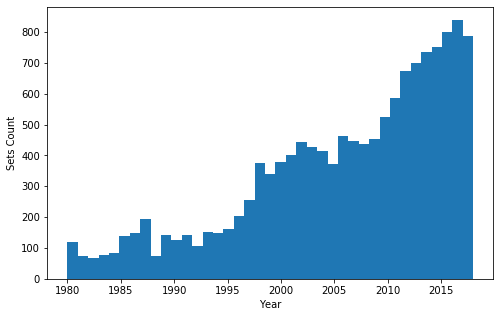

In [43]:
# plot number of sets per year

fig, axs = plt.subplots(1, 1, figsize=(8, 5))
axs.hist(set_df['year'].values, bins=set_df['year'].unique().shape[0])
axs.set(xlabel='Year', ylabel='Sets Count')
plt.show()

In [12]:
# clean up dimensions

set_df.loc[set_df['dimensions'].isna()==False][100:110][['set_no', 'name', 'year', 'dimensions', 'weight']]

,set_no,name,year,dimensions,weight
5200,3297-1,Scoop and Lofty at the Building Yard,2005.0,48 x 28.8 x 9.6 cm (18.9 x 11.3 x 3.8 in),1.04Kg (2.29 lb)
5213,4103-2,Fun with Bricks,2005.0,22.7 x 21.3 x 22.7 cm (8.9 x 8.4 x 8.9 in),0.52Kg (1.15 lb)
5233,4762-1,Rescue from the Merpeople,2005.0,19.2 x 28.8 x 4.8 cm (7.6 x 11.3 x 1.9 in),0.3Kg (0.66 lb)
5234,4766-1,Graveyard Duel,2005.0,38.4 x 28.8 x 6 cm (15.1 x 11.3 x 2.4 in),0.8Kg (1.76 lb)
5235,4767-1,Harry and the Hungarian Horntail,2005.0,38.4 x 28.8 x 6 cm (15.1 x 11.3 x 2.4 in),0.62Kg (1.37 lb)
5236,4768-1,The Durmstrang Ship,2005.0,48 x 28.8 x 9.6 cm (18.9 x 11.3 x 3.8 in),1.2Kg (2.64 lb)
5238,4770-1,Blizzard Blaster,2005.0,38.4 x 28.8 x 6 cm (15.1 x 11.3 x 2.4 in),0.66Kg (1.45 lb)
5239,4774-1,Scorpion Orb Launcher,2005.0,28.8 x 28.8 x 4.8 cm (11.3 x 11.3 x 1.9 in),0.39Kg (0.86 lb)
5241,4779-1,Defence Tower,2005.0,28.8 x 38.4 x 9.6 cm (11.3 x 15.1 x 3.8 in),1.06Kg (2.33 lb)
5246,4784-1,Castle Black Dragon,2005.0,28.8 x 19.2 x 11.4 cm (11.3 x 7.6 x 4.5 in),0.37Kg (0.81 lb)


In [13]:
set_df['volume'] = set_df['dimensions'].apply(lh.clean_dimension)
set_df.loc[set_df['dimensions'].isna()==False][100:105][['set_no', 'name', 'year', 'dimensions', 'volume']]

,set_no,name,year,dimensions,volume
5200,3297-1,Scoop and Lofty at the Building Yard,2005.0,48 x 28.8 x 9.6 cm (18.9 x 11.3 x 3.8 in),13271.040
5213,4103-2,Fun with Bricks,2005.0,22.7 x 21.3 x 22.7 cm (8.9 x 8.4 x 8.9 in),10975.677
5233,4762-1,Rescue from the Merpeople,2005.0,19.2 x 28.8 x 4.8 cm (7.6 x 11.3 x 1.9 in),2654.208
5234,4766-1,Graveyard Duel,2005.0,38.4 x 28.8 x 6 cm (15.1 x 11.3 x 2.4 in),6635.520
5235,4767-1,Harry and the Hungarian Horntail,2005.0,38.4 x 28.8 x 6 cm (15.1 x 11.3 x 2.4 in),6635.520


In [14]:
# clean the weight

set_df['weight_cl'] = set_df['weight'].apply(lh.clean_weight)
set_df.loc[set_df['weight'].isna()==False][100:105][['set_no', 'name', 'year', 'weight', 'weight_cl']]

,set_no,name,year,weight,weight_cl
5233,4762-1,Rescue from the Merpeople,2005.0,0.3Kg (0.66 lb),0.30
5234,4766-1,Graveyard Duel,2005.0,0.8Kg (1.76 lb),0.80
5235,4767-1,Harry and the Hungarian Horntail,2005.0,0.62Kg (1.37 lb),0.62
5236,4768-1,The Durmstrang Ship,2005.0,1.2Kg (2.64 lb),1.20
5238,4770-1,Blizzard Blaster,2005.0,0.66Kg (1.45 lb),0.66


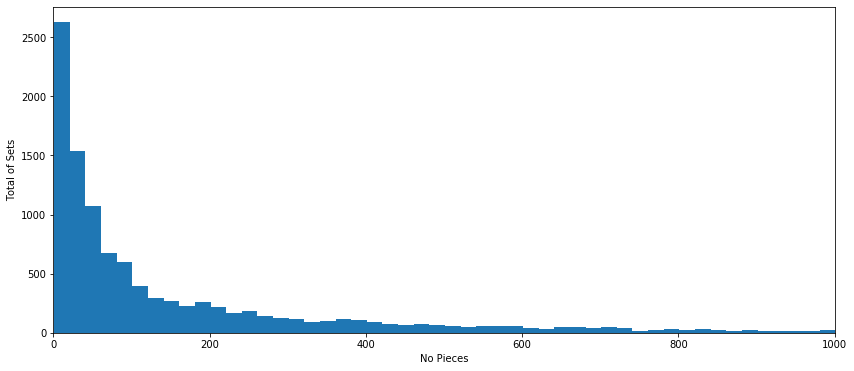

In [15]:
# plot the piece count distribution

fig, axs = plt.subplots(1, 1, figsize=(14, 6))
axs.hist(set_df.loc[(set_df['piece_cnt'] >= 1)]['piece_cnt'].values, bins=500)
axs.set(xlabel='No Pieces', ylabel='Total of Sets', xlim=(0, 1000))
plt.show()

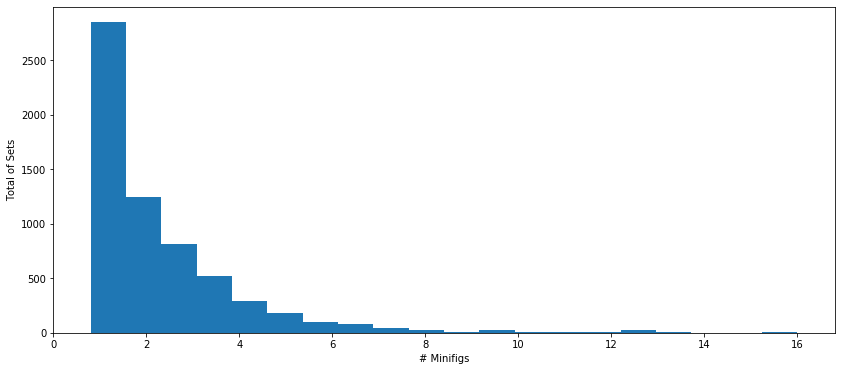

In [16]:
# plot the minifig count distribution

minifig_df = set_df.loc[(set_df['minifig_cnt'] >= 1) & (set_df['minifig_cnt'] <= 20)]

fig, axs = plt.subplots(1, 1, figsize=(14, 6))
axs.hist(minifig_df['minifig_cnt'].values, bins=20)
axs.set(xlabel='# Minifigs', ylabel='Total of Sets', xlim=(0, 21))
axs.set_xticklabels(range(0, 22, 2))

plt.show()

In [17]:
# clean up the store price

set_df['price_store'] = set_df['store_price'].apply(lh.clean_price)
set_df[['set_no', 'name', 'store_price', 'price_store']][1305:1315]

,set_no,name,store_price,price_store
1305,2780-1,Complete Playhouse,NaN,NaN
1306,4011-1,Cabin Cruiser,$19.75,19.75
1307,4021-1,Police Patrol,$34.00,34.00
1308,4031-1,Firefighter,$52.00,52.00
1309,4515-1,Straight Rails,"£11.99, $12.99",12.99
1310,4520-1,Curved Rails,"£11.99, $12.99",12.99
1311,4531-1,Manual Points with Track,$27.99,27.99
1312,4536-1,Blue Hopper Car,$15.00,15.00
1313,4539-1,Manual Level Crossing,$25.00,25.00
1314,4543-1,Railroad Tractor Flatbed,$22.00,22.00


/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


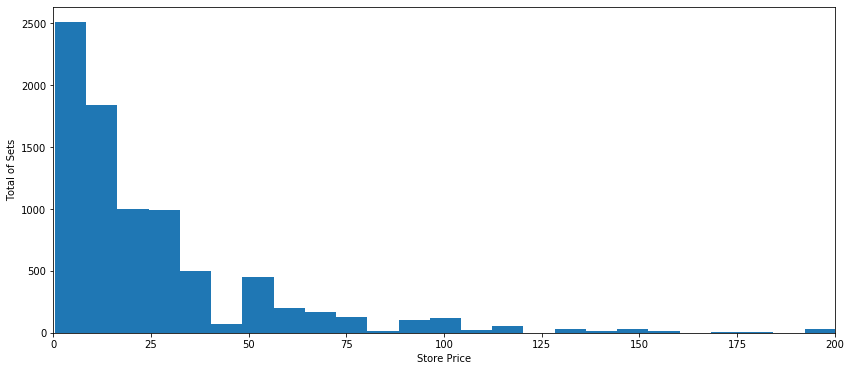

In [18]:
fig, axs = plt.subplots(1, 1, figsize=(14, 6))
axs.hist(set_df['price_store'].values, bins=100)
axs.set(xlabel='Store Price', ylabel='Total of Sets', xlim=(0, 200))

plt.show()

In [19]:
# create 2 new columns for current price

set_df['price_used'] = set_df['current_price'].apply(lh.get_price_used)
set_df['price_new'] = set_df['current_price'].apply(lh.get_price_new)
set_df[['set_no', 'name', 'current_price', 'price_used', 'price_new']][2205:2215]

,set_no,name,current_price,price_used,price_new
2205,2161-1,Aqua Dozer,"New: $90, Used: $21",21.0,90.0
2206,2162-1,Hydro Reef Wrecker,"New: $89, Used: $44",44.0,89.0
2207,2163-1,Toucan,"New: $1, Used: $0",0.0,1.0
2208,2164-1,Whale,"New: $2, Used: $1",1.0,2.0
2209,2165-1,Rhinocerous,"New: $2, Used: Not known",NaN,2.0
2210,2166-1,Elephant,"New: $3, Used: Not known",NaN,3.0
2211,2167-1,Penguin,"New: $2, Used: Not known",NaN,2.0
2212,2168-1,Rattle,"New: $5, Used: Not known",NaN,5.0
2213,2181-1,Infomaniac,"New: $44, Used: $45",45.0,44.0
2214,2184-1,XL Bulk Bucket,"New: Not known, Used: Not known",NaN,NaN


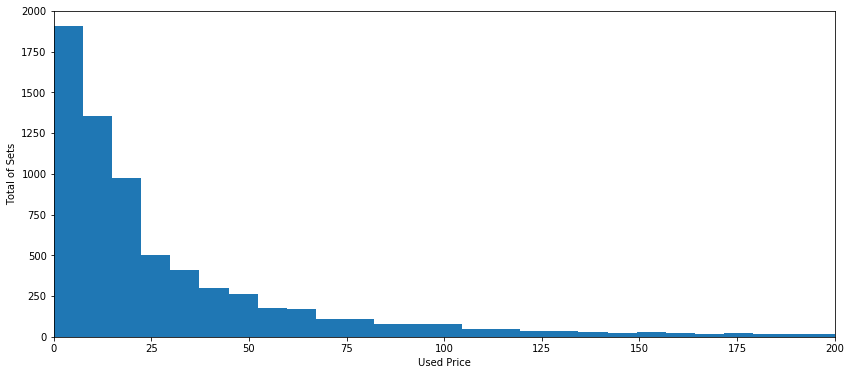

In [20]:
fig, axs = plt.subplots(1, 1, figsize=(14, 6))
axs.hist(set_df['price_used'].values, bins=200)
axs.set(xlabel='Used Price', ylabel='Total of Sets', xlim=(0, 200))

plt.show()

In [21]:
# clean the ratings votes column

set_df['rating_votes_cl'] = set_df['rating_votes'].apply(lh.clean_votes).astype('float')
set_df[['set_no', 'name', 'rating_votes', 'rating_votes_cl']][2205:2215]

,set_no,name,rating_votes,rating_votes_cl
2205,2161-1,Aqua Dozer,6,6.0
2206,2162-1,Hydro Reef Wrecker,3,3.0
2207,2163-1,Toucan,NaN,NaN
2208,2164-1,Whale,NaN,NaN
2209,2165-1,Rhinocerous,NaN,NaN
2210,2166-1,Elephant,NaN,NaN
2211,2167-1,Penguin,1review,1.0
2212,2168-1,Rattle,NaN,NaN
2213,2181-1,Infomaniac,2,2.0
2214,2184-1,XL Bulk Bucket,NaN,NaN


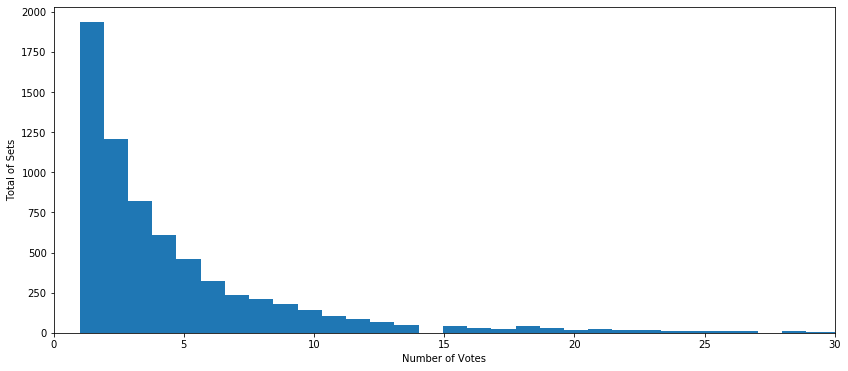

In [22]:
# since there aren't a lot of sets with high votes, the ratings aren't very reliable

fig, axs = plt.subplots(1, 1, figsize=(14, 6))
axs.hist(set_df['rating_votes_cl'].values, bins=100)
axs.set(xlabel='Number of Votes', ylabel='Total of Sets', xlim=(0, 30))  # most votes ~100

plt.show()

In [23]:
# investigate the tags 

tag_raw_ls = set_df.loc[set_df['tags'].isna()==False]['tags'].values
tag_raw_ls.shape

(10269,)

In [24]:
tag_st = set(tag_raw_ls)
len(tag_st)

6220

In [25]:
tag_ls = lh.count_in_lists(list(tag_st))
tag_df = pd.DataFrame(tag_ls).sort_values('count', ascending=False).reset_index()
tag_df = tag_df[['tag', 'count']]
tag_df.head()

,tag,count
0,Polybag,638
1,Aircraft,572
2,Microscale,449
3,Car,422
4,Truck,353


In [26]:
tag_df.shape

(2845, 2)

In [27]:

set_df['main_tag'] = set_df['tags'].apply(lh.get_main_tag)
set_df[['set_no', 'name', 'tags', 'main_tag']][1000:1005]

,set_no,name,tags,main_tag
1000,1649-1,Sea Skimmer,"Polybag, Mcdonalds, Airboat",None
1001,1653-1,Container Set,NaN,None
1002,1661-1,Basic Building Set,NaN,None
1003,1662-1,Basic Building Set,"House, Baseplate, Boat, Ship, Horse, Carriage,...",None
1004,1663-1,Basic Building Set,NaN,None


In [28]:
# set type
# only the Normal type should be kept
# Gear is keychains, games 
# Collection is Normal sets bundled together, these are not in the secondary market
# Extended can be like Collection, but even more unavailable 

set_df['set_type'].value_counts()

Normal        9913
Gear          2066
Other          645
Collection     489
Extended       348
Book           265
Random          36
Name: set_type, dtype: int64

In [29]:
set_df.loc[set_df['set_type']=='Gear'][200:205]

,set_no,name,theme_group,theme,subtheme,year,dimensions,weight,piece_cnt,minifig_cnt,...,set_type,packaging,notes,volume,weight_cl,price_store,price_used,price_new,rating_votes_cl,main_tag
4709,14683-1,BIONICLE: The Game,Miscellaneous,Gear,Video Games/PC,2003.0,NaN,NaN,NaN,0.0,...,Gear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,None
4710,14684-1,BIONICLE: The Game,Miscellaneous,Gear,Video Games/Game Boy Advance,2003.0,NaN,NaN,NaN,0.0,...,Gear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,None
4724,850252-1,Johnny Thunder,Miscellaneous,Gear,Key Chains/Adventurers,2003.0,NaN,NaN,NaN,0.0,...,Gear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
4725,850352-1,Snowtrooper,Miscellaneous,Gear,Key Chains/Star Wars,2003.0,NaN,NaN,NaN,0.0,...,Gear,NaN,Cardboard Back,NaN,NaN,NaN,NaN,NaN,NaN,None
4726,850356-1,C-3PO,Miscellaneous,Gear,Key Chains/Star Wars,2003.0,NaN,NaN,NaN,0.0,...,Gear,NaN,Cardboard Back,NaN,NaN,NaN,NaN,NaN,NaN,None


In [30]:
# packaging 
# keep Box and NaN

set_df['packaging'].value_counts()

Box                      5310
Polybag                  1732
Foil pack                 853
Blister pack              218
None (loose parts)        173
Bucket                    129
Other                     120
Tag                       114
Canister                   73
Tub                        66
Plastic box                58
Shrink-wrapped             25
Box with backing card      23
Box with handle            14
Zip-lock bag                9
Plastic canister            6
Name: packaging, dtype: int64

In [31]:
set_df.loc[set_df['packaging']!='Box'].shape

(8452, 27)

In [32]:
set_df.loc[set_df['packaging']=='Box'].sort_values('piece_cnt')[20:25]

,set_no,name,theme_group,theme,subtheme,year,dimensions,weight,piece_cnt,minifig_cnt,...,set_type,packaging,notes,volume,weight_cl,price_store,price_used,price_new,rating_votes_cl,main_tag
3514,1239-1,Subzero,Racing,Racers,Xalax,2001.0,NaN,NaN,4.0,0.0,...,Normal,Box,Promotional release with Birdseye/Walls frozen...,NaN,NaN,NaN,5.0,5.0,5.0,None
6170,7996-1,Train Rail Crossing,Modern day,City,Trains,2007.0,NaN,NaN,4.0,0.0,...,Normal,Box,NaN,NaN,NaN,24.99,97.0,114.0,2.0,None
1175,2550-1,Tom's Adventure,Pre-school,Duplo,NaN,1990.0,NaN,NaN,4.0,1.0,...,Normal,Box,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
3486,8515-1,RoboRider Wheels,Technical,Technic,Robo Riders,2000.0,NaN,NaN,4.0,0.0,...,Normal,Box,NaN,NaN,NaN,2.00,1.0,3.0,2.0,None
5008,8613-1,Kanoka Disk Launcher Pack,Constraction,Bionicle,Accessories,2004.0,NaN,NaN,4.0,0.0,...,Normal,Box,NaN,NaN,NaN,2.00,1.0,3.0,8.0,None


In [33]:
set_df.loc[set_df['packaging'].isna()].shape

(4839, 27)

In [34]:
set_df.loc[set_df['packaging']=='Polybag'].sort_values('piece_cnt')[['set_no', 'name', 'theme_group', 'theme', 'piece_cnt', 
                                                     'year', 'packaging', 'price_store', 'price_new', 'price_used']][20:25]

,set_no,name,theme_group,theme,piece_cnt,year,packaging,price_store,price_new,price_used
8986,4659612-1,Spinner ring,Action/Adventure,Ninjago,1.0,2012.0,Polybag,NaN,6.0,NaN
3511,1202-1,Single Racers Figure Pack,Racing,Racers,1.0,2001.0,Polybag,NaN,NaN,NaN
828,5105-1,Pneumatic Piston Cylinder 64 mm Yellow,Miscellaneous,Service Packs,1.0,1987.0,Polybag,2.5,11.0,NaN
827,5104-1,Pneumatic Piston Cylinder 48 mm Yellow,Miscellaneous,Service Packs,1.0,1987.0,Polybag,2.0,14.0,6.0
826,5103-1,Pneumatic Spring Cylinder 48 mm Red,Miscellaneous,Service Packs,1.0,1987.0,Polybag,2.0,10.0,NaN


In [35]:
# notes - several keywords are available, but they are not more useful than existing columns
# there are only 49 re-released sets, which all have their own fields, so keeping them as is is fine

note_df = set_df.loc[set_df['notes'].isna()==False]
note_df.loc[note_df['notes'].str.contains('Re-released version')][['set_no', 'name', 'notes']].shape

(49, 3)

In [36]:
set_df.loc[set_df['set_no']=='4999-1']

,set_no,name,theme_group,theme,subtheme,year,dimensions,weight,piece_cnt,minifig_cnt,...,set_type,packaging,notes,volume,weight_cl,price_store,price_used,price_new,rating_votes_cl,main_tag
6494,4999-1,Vestas Wind Turbine,Model making,Creator Expert,Vestas,2008.0,NaN,NaN,815.0,3.0,...,Normal,Box,Limited edition set released in conjunction wi...,NaN,NaN,NaN,233.0,351.0,4.0,None


In [37]:
set_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13762 entries, 0 to 13761
Data columns (total 27 columns):
set_no             13762 non-null object
name               13762 non-null object
theme_group        13762 non-null object
theme              13762 non-null object
subtheme           10048 non-null object
year               13762 non-null float64
dimensions         2925 non-null object
weight             3086 non-null object
piece_cnt          10862 non-null float64
minifig_cnt        13762 non-null float64
inventory_url      6961 non-null object
minifig_url        6266 non-null object
store_price        9188 non-null object
current_price      13762 non-null object
rating_value       6825 non-null float64
rating_votes       6825 non-null object
tags               10269 non-null object
set_type           13762 non-null object
packaging          8923 non-null object
notes              5233 non-null object
volume             2925 non-null float64
weight_cl          3086 non-null fl

In [38]:
# keep only the clean columns 

set_clean_df = set_df[['set_no', 'name',  
                 'theme_group', 'theme', 'subtheme',
                 'year', 'volume', 'weight_cl', 
                 'piece_cnt', 'minifig_cnt', 'inventory_url', 'minifig_url',
                 'price_store', 'price_new', 'price_used', 'rating_value', 'rating_votes_cl', 
                 'main_tag', 'set_type', 'packaging']]
set_clean_df = set_clean_df.rename(columns={'rating_votes_cl': 'rating_votes', 'weight_cl': 'weight'})
set_clean_df[2000:2010]

,set_no,name,theme_group,theme,subtheme,year,volume,weight,piece_cnt,minifig_cnt,inventory_url,minifig_url,price_store,price_new,price_used,rating_value,rating_votes,main_tag,set_type,packaging
2000,1856-1,Water Park Tub,Pre-school,Duplo,NaN,1996.0,NaN,NaN,71.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,Normal,Tub
2001,1857-1,Super Value Brick Pack,Basic,Basic,NaN,1996.0,NaN,NaN,950.0,0.0,NaN,NaN,NaN,NaN,72.0,NaN,NaN,None,Normal,Box
2002,1858-1,Droid Scout,Action/Adventure,Space,Exploriens,1996.0,NaN,NaN,23.0,1.0,/inventories/1858-1,/minifigs/inset-1858-1,NaN,37.0,13.0,4.0,2.0,None,Normal,Box
2003,1859-1,Aeroplane,Basic,Basic,NaN,1996.0,NaN,NaN,9.0,0.0,/inventories/1859-1,NaN,NaN,4.0,1.0,NaN,NaN,None,Normal,Polybag
2004,1861-1,Box of Bricks,Pre-school,Duplo,NaN,1996.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,Normal,NaN
2005,1866-1,Stack-n-Learn Sampler,Pre-school,Duplo,NaN,1996.0,NaN,NaN,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,Normal,Polybag
2006,1868-1,Freestyle Box,Basic,Freestyle,NaN,1996.0,NaN,NaN,220.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,Normal,Box
2007,1869-1,South African Flag,Basic,Basic,NaN,1996.0,NaN,NaN,80.0,0.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,None,Normal,NaN
2008,2004-1,Jumbo Building Tub,Pre-school,Duplo,Primo,1996.0,NaN,NaN,51.0,1.0,NaN,/minifigs/inset-2004-1,NaN,NaN,NaN,NaN,NaN,None,Normal,Tub
2009,2005-1,Duplo Primo,Pre-school,Primo,NaN,1996.0,NaN,NaN,17.0,1.0,NaN,/minifigs/inset-2005-1,NaN,NaN,NaN,NaN,NaN,None,Normal,NaN


In [39]:
set_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13762 entries, 0 to 13761
Data columns (total 20 columns):
set_no           13762 non-null object
name             13762 non-null object
theme_group      13762 non-null object
theme            13762 non-null object
subtheme         10048 non-null object
year             13762 non-null float64
volume           2925 non-null float64
weight           3086 non-null float64
piece_cnt        10862 non-null float64
minifig_cnt      13762 non-null float64
inventory_url    6961 non-null object
minifig_url      6266 non-null object
price_store      8384 non-null float64
price_new        8532 non-null float64
price_used       7048 non-null float64
rating_value     6825 non-null float64
rating_votes     6825 non-null float64
main_tag         0 non-null object
set_type         13762 non-null object
packaging        8923 non-null object
dtypes: float64(10), object(10)
memory usage: 2.1+ MB


In [40]:
# most expensive set

set_clean_df.sort_values('price_store', ascending=False)[
    ['set_no', 'name', 'theme_group', 'theme', 'subtheme', 'year', 'price_store', 'price_new', 'price_used']].head(10)

,set_no,name,theme_group,theme,subtheme,year,price_store,price_new,price_used
12626,75192-1,Millennium Falcon,Licensed,Star Wars,Ultimate Collector Series,2017.0,799.99,730.0,496.0
9689,2000430-1,Identity and Landscape Kit,Educational,Serious Play,NaN,2013.0,789.99,763.0,NaN
9690,2000431-1,Connections Kit,Educational,Serious Play,NaN,2013.0,754.99,598.0,NaN
6251,10179-1,Ultimate Collector's Millennium Falcon,Licensed,Star Wars,Ultimate Collector Series,2007.0,499.99,1441.0,1059.0
11846,75159-1,Death Star,Licensed,Star Wars,Ultimate Collector Series,2016.0,499.99,415.0,355.0
7792,2000409-1,Window Exploration Bag,Educational,Serious Play,NaN,2010.0,484.99,426.0,NaN
6716,10188-1,Death Star,Licensed,Star Wars,Ultimate Collector Series,2008.0,399.99,374.0,298.0
8174,10221-1,Super Star Destroyer,Licensed,Star Wars,Ultimate Collector Series,2011.0,399.99,707.0,589.0
13403,71043-1,Hogwarts Castle,Licensed,Harry Potter,General,2018.0,399.99,347.0,306.0
12975,10261-1,Roller Coaster,Model making,Creator Expert,Fairground,2018.0,379.99,301.0,308.0


In [41]:
# most expensive used set

set_clean_df.sort_values('price_used', ascending=False)[
    ['set_no', 'name', 'theme_group', 'theme', 'subtheme', 'year', 'price_store', 'price_new', 'price_used']].head(10)

,set_no,name,theme_group,theme,subtheme,year,price_store,price_new,price_used
419,106-1,UNICEF Van,Modern day,Town,Special,1985.0,NaN,NaN,1493.0
6251,10179-1,Ultimate Collector's Millennium Falcon,Licensed,Star Wars,Ultimate Collector Series,2007.0,499.99,1441.0,1059.0
8393,4000002-1,LOM 2011 Moulding,Miscellaneous,Miscellaneous,LEGO internal,2011.0,NaN,1272.0,1000.0
3281,3450-1,Statue of Liberty,Model making,Creator Expert,Sculptures,2000.0,199.00,200.0,971.0
7150,10196-1,Grand Carousel,Model making,Creator Expert,Fairground,2009.0,249.99,1724.0,862.0
4698,10123-1,Cloud City,Licensed,Star Wars,Episode V,2003.0,100.00,1063.0,778.0
4277,10030-1,Imperial Star Destroyer,Licensed,Star Wars,Ultimate Collector Series,2002.0,269.99,1581.0,775.0
6713,10185-1,Green Grocer,Model making,Creator Expert,Modular Buildings,2008.0,149.99,862.0,721.0
5473,10143-1,Death Star II,Licensed,Star Wars,Ultimate Collector Series,2005.0,269.99,1101.0,714.0
3891,10018-1,Darth Maul,Licensed,Star Wars,Ultimate Collector Series,2001.0,150.00,1497.0,687.0


## Export to csv

In [42]:
save_path = r'../data/brickset_set_clean.csv'
set_clean_df.to_csv(save_path, index=False)
f'{round(os.path.getsize(save_path) /1e6, 2)} mb'

'1.76 mb'